In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
att_close = pd.read_csv("PA_close_new.csv")
att_open = pd.read_csv("PA_open_new.csv")

In [5]:
li = ['business_id']
new_close = att_close.loc[:,li]
new_open = att_open.loc[:,li]

In [6]:
df_combined = pd.concat([new_close, new_open])
df_combined.shape

(505, 1)

In [7]:
df_combined.head

<bound method NDFrame.head of                 business_id
0    MTSW4McQd7CbVtyjqoe9mw
1    MyE_zdul_JO-dOHOug4GQQ
2    JomDoQafikclSVVCPkWjnA
3    EraDGJAHjf5IaA9VBGepfg
4    0346ZLBXCnsGief7r2kmQQ
..                      ...
274  hUmHwBQtGg0iH-PZakQJDw
275  y8gjlpJA89qDRCLC0JQaew
276  oZzN706lKoL4faaTK739xA
277  bmJgvpuf2GBXd62ELK0Q2w
278  wVxXRFf10zTTAs11nr4xeA

[505 rows x 1 columns]>

In [8]:
data_list = []

with open('review.json', 'r', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        data_list.append(data)

review = pd.DataFrame(data_list)

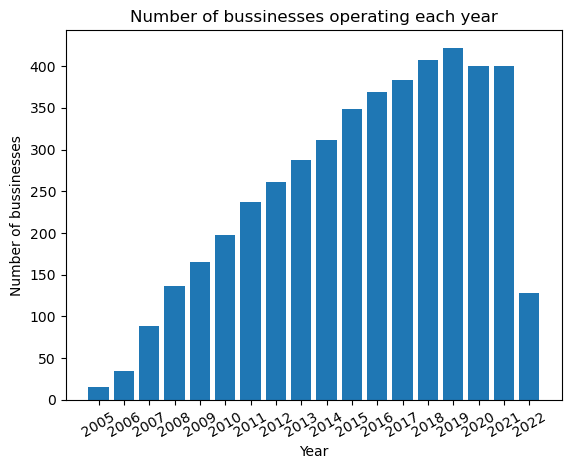

In [21]:
review = review[review['business_id'].isin(df_combined['business_id'])]

review = review[['date', 'business_id']]

review['year'] = pd.DatetimeIndex(review['date']).year

review_count = review.groupby(['year', 'business_id']).size().reset_index(name='count')

bussiness_count = review_count.groupby('year')['business_id'].nunique().reset_index(name='count')

years = bussiness_count["year"].unique().tolist()

plt.bar(bussiness_count["year"], bussiness_count["count"])
plt.xticks(years, years, rotation=30)
plt.xlabel("Year")
plt.ylabel("Number of bussinesses")
plt.title("Number of bussinesses operating each year")
plt.show()

